Epoch 3493 : Gradient norm is below threshold. Exiting the loop.
3493 9.991440571007282e-11
Epoch 517 : Gradient norm is below threshold. Exiting the loop.
517 9.995911066886531e-11
Epoch 193 : Gradient norm is below threshold. Exiting the loop.
193 9.619445453263229e-11


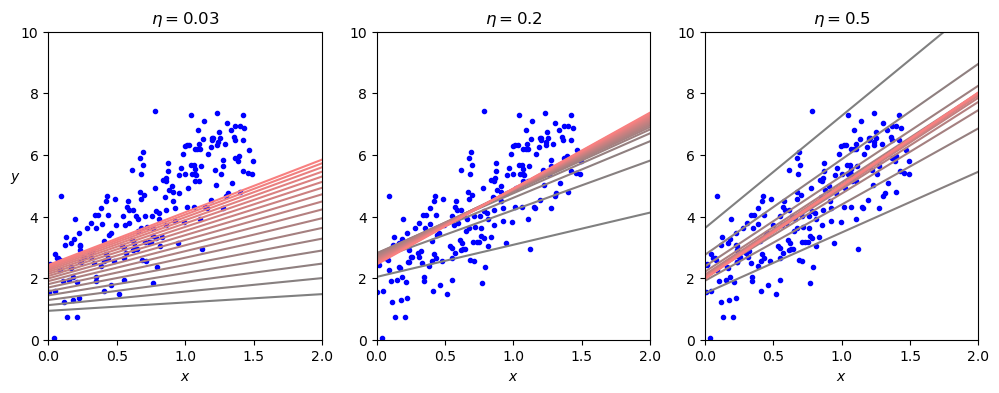

In [29]:
'''Batch Gradient Descent Using different learning rates'''
# importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature

m = 200
X = 1.5 * np.random.rand(m,1)
y = 2 + 3*X + np.random.randn(m,1)
x_train = add_dummy_feature(X)

x_topredict = np.array([[0], [3]])
x_topredict_resized = add_dummy_feature(x_topredict)

# Initialize parameters
etas = [0.03,0.2,0.5]  # Learning rates

# Plot
def plot_bgd(pheta, eta,gradient_norm_threshold = 1e-10):
    m = len(x_train)
    epochs = 100000
    n_lines = 17
    plt.plot(X, y, 'b.')
    for epoch in range(epochs):
        gradient = (2 / m) * x_train.T @ (x_train @ pheta - y)
        pheta = pheta - (eta * gradient)
        y_predict = x_topredict_resized @ pheta
        if epoch < n_lines:
            color = (0.5 + epoch / (2 * n_lines), 0.5, 0.5)  # Varying saturation or brightness
            plt.plot(x_topredict, y_predict, color=color)
            plt.xlabel("$x$")
            plt.title(fr"$\eta = {eta}$")
            plt.axis([0, 2, 0, 10])

        # Check the norm of the gradient array
        gradient_norm = np.linalg.norm(gradient)        
        # Check if the gradient norm is below the threshold
        if gradient_norm < gradient_norm_threshold:
            print("Epoch", epoch, ": Gradient norm is below threshold. Exiting the loop.")
            break
    return print(epoch,gradient_norm)

    plt.grid(True)  # Add grid to the plot

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.ylabel("$y$",rotation=0)
plot_bgd(np.random.randn(2, 1), etas[0])
plt.subplot(132)
plot_bgd(np.random.randn(2, 1), etas[1])
plt.subplot(133)
plot_bgd(np.random.randn(2, 1), etas[2])
plt.show()
